<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Intrusion_Detection_Systems_(IDS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
galaxyh_kdd_cup_1999_data_path = kagglehub.dataset_download('galaxyh/kdd-cup-1999-data')

print('Data source import complete.')


Project Outline:
Objective: Build an IDS to detect malicious activity (e.g., DoS attacks, probing, etc.) using machine learning.

Dataset: Use the KDD Cup 1999 Dataset, which is widely used for IDS projects. It contains network traffic data with labeled instances of attacks and normal behavior.

You can find the dataset here:

KDD Cup 1999 Data
Steps to Build the IDS:
1. Data Preprocessing:
Load the dataset and clean it by handling missing values and irrelevant features.
Encode categorical variables (like network protocols, flags, etc.) into numerical values using techniques like one-hot encoding or label encoding.
Normalize/standardize the data for better model performance.
2. Feature Engineering:
The KDD dataset includes many features, some of which may not be useful for intrusion detection. You can drop irrelevant features and focus on the ones that carry the most information.
3. Model Selection:
We'll start with a few common machine learning algorithms to detect intrusions:
Logistic Regression
Random Forest
Support Vector Machine (SVM)
K-Nearest Neighbors (KNN)
4. Model Training and Evaluation:
Split the dataset into training and test sets.
Evaluate the models using performance metrics like accuracy, precision, recall, F1-score, and confusion matrix.
5. Visualization:
Use visualizations like confusion matrix and ROC curve to evaluate model performance.
You can also visualize the importance of different features to understand which attributes are most important for detecting intrusions.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the KDD Cup dataset
# Assuming the dataset is in CSV format, with the target column being 'class'
data = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected', header=None)

In [ ]:
# Column names for the dataset (you can adjust this based on the specific file you're using)
data.columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]


In [ ]:
# Data Preprocessing
# Encoding categorical features
label_encoder = LabelEncoder()
data['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])
data['service'] = label_encoder.fit_transform(data['service'])
data['flag'] = label_encoder.fit_transform(data['flag'])
data['class'] = label_encoder.fit_transform(data['class'])  # Normal (0) or Attack (1)


In [ ]:
# Splitting the dataset into features and target
X = data.drop('class', axis=1)
y = data['class']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.88      0.64      0.74        11
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91        12
           4       1.00      0.67      0.80         3
           5       0.99      0.99      0.99       385
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00     32002
          10       0.98      0.97      0.98        61
          11       1.00      1.00      1.00     29192
          12       0.00      0.00      0.00         2
          14       1.00      1.00      1.00        60
          15       1.00      0.99      1.00       340
          16       0.00      0.00      0.00         2
          17       1.00      0.99      0.99       469
          18       1.00    

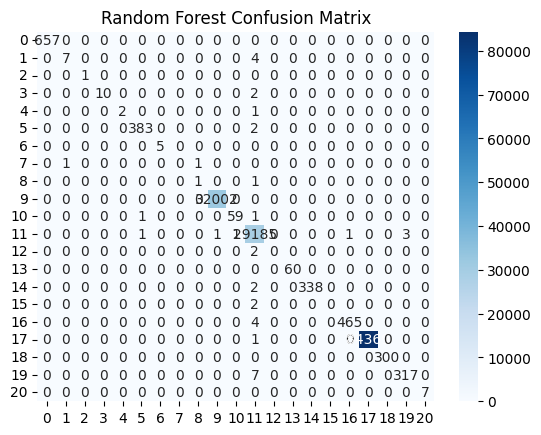

SVM Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       657
           1       1.00      0.55      0.71        11
           2       0.33      1.00      0.50         1
           3       1.00      0.92      0.96        12
           4       1.00      0.67      0.80         3
           5       0.97      0.99      0.98       385
           6       1.00      0.60      0.75         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     32002
          10       0.97      0.95      0.96        61
          11       1.00      1.00      1.00     29192
          12       0.40      1.00      0.57         2
          14       1.00      1.00      1.00        60
          15       0.99      1.00      1.00       340
          16       0.00      0.00      0.00         2
          17       1.00      0.97      0.98       469
          18       1.00    

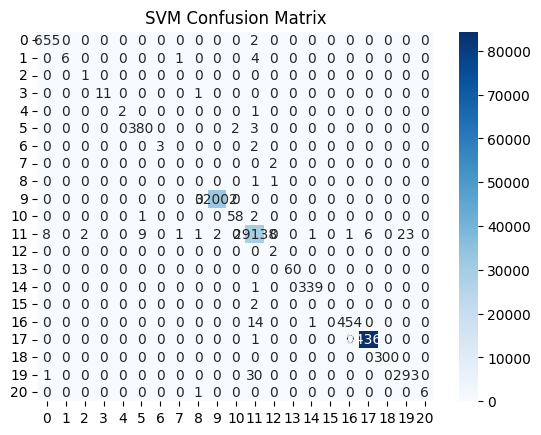

In [ ]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model 2: Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluation: Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Evaluation: SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt="d", cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
using Hypaerparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
# Encoding categorical features
label_encoder = LabelEncoder()
data['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])
data['service'] = label_encoder.fit_transform(data['service'])
data['flag'] = label_encoder.fit_transform(data['flag'])
data['class'] = label_encoder.fit_transform(data['class'])  # Normal (0) or Attack (1)

# Splitting features and target
X = data.drop('class', axis=1)
y = data['class']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)









In [ ]:
# -------------------------------------
# Hyperparameter Tuning: Random Forest
# -------------------------------------
rf_params = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split a node
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_grid.best_estimator_

# Predictions
rf_predictions = best_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.88      0.64      0.74        11
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91        12
           4       1.00      0.67      0.80         3
           5       0.99      1.00      1.00       385
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00     32002
          10       0.98      0.97      0.98        61
          11       1.00      1.00      1.00     29192
          12       0.00      0.00      0.00         2
          14       1.00      1.00      1.00        60
          15       1.00      0.99      1.00       340
          16       0.00      0.00      0.00         2
          17       1.00      0.99      0.99       469
          18       1.00    

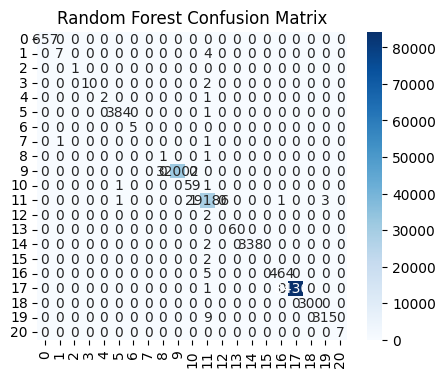

In [ ]:
# Evaluation
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# -------------------------------------
# Hyperparameter Tuning: SVM
# -------------------------------------
svm_params = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf']  # Type of kernel
}

svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      0.45      0.62        11
           2       0.50      1.00      0.67         1
           3       1.00      0.83      0.91        12
           4       1.00      0.67      0.80         3
           5       0.99      0.98      0.99       385
           6       1.00      0.60      0.75         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     32002
          10       0.94      0.95      0.94        61
          11       1.00      1.00      1.00     29192
          12       1.00      1.00      1.00         2
          14       1.00      1.00      1.00        60
          15       1.00      0.99      0.99       340
          16       0.00      0.00      0.00         2
          17       0.99      0.98      0.99       469
          18       1.00    

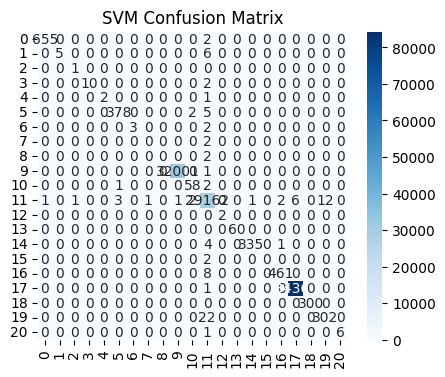

In [ ]:
# Best SVM model
best_svm = svm_grid.best_estimator_

# Predictions
svm_predictions = best_svm.predict(X_test)

# Evaluation
print("Best SVM Parameters:", svm_grid.best_params_)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt="d", cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()